## Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

## Load Data 

In [2]:
df = pd.read_csv('C:/Users/ANKIT/Desktop/advertising.csv')

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
 # check the shape
df.shape

(1000, 10)

In [5]:
# check if there are some missing values
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [6]:
target = df['Clicked on Ad']
df['Clicked on Ad'].value_counts()

1    500
0    500
Name: Clicked on Ad, dtype: int64

## EDA and Data Engineering

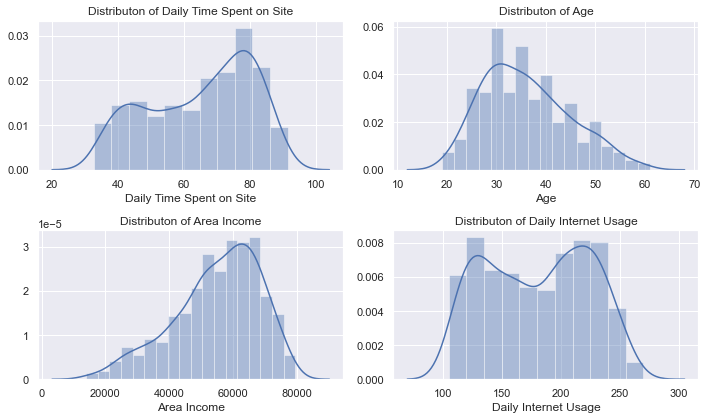

In [7]:
# check the distributions for numerical data
plt.figure(figsize=(10,6))
for i in range(0,4):
    plt.subplot(2,2,i+1)
    sns.distplot(df[df.columns[i]])
    plt.title('Distributon of {}'.format(df.columns[i]))
plt.tight_layout()

In [8]:
# statistical Desription
df[df.columns[0:4]].describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,65.000200,36.009000,55000.000080,180.000100
std,15.853615,8.785562,13414.634022,43.902339
min,32.600000,19.000000,13996.500000,104.780000
25%,51.360000,29.000000,47031.802500,138.830000
50%,68.215000,35.000000,57012.300000,183.130000
75%,78.547500,42.000000,65470.635000,218.792500
max,91.430000,61.000000,79484.800000,269.960000


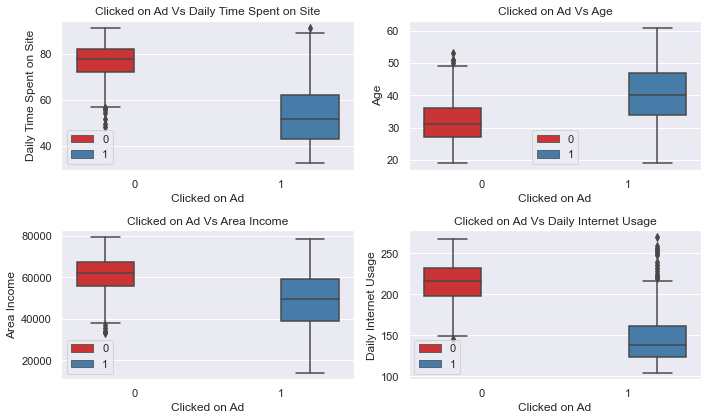

In [9]:
# numerical data vs target
plt.figure(figsize=(10,6))
for i in range(0,4):
    plt.subplot(2,2,i+1)
    sns.boxplot(x='Clicked on Ad',y=df.columns[i],
               hue='Clicked on Ad',data=df,palette='Set1')
    plt.title('Clicked on Ad Vs {}'.format(df.columns[i]))
    plt.legend(loc='best')
plt.tight_layout()

In [10]:
df['Ad Topic Line'][:10]

0       Cloned 5thgeneration orchestration
1       Monitored national standardization
2         Organic bottom-line service-desk
3    Triple-buffered reciprocal time-frame
4            Robust logistical utilization
5          Sharable client-driven software
6               Enhanced dedicated support
7                 Reactive local challenge
8           Configurable coherent function
9       Mandatory homogeneous architecture
Name: Ad Topic Line, dtype: object

In [11]:
len(df['Ad Topic Line'].value_counts())

1000

In [12]:
from itertools import chain

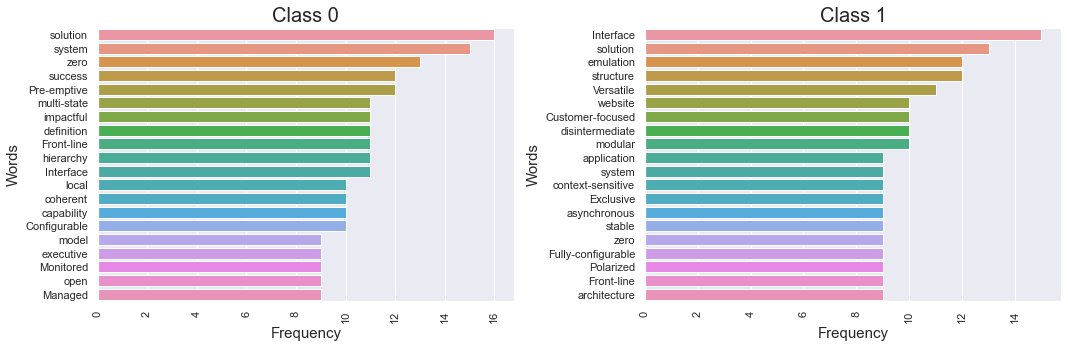

In [13]:
class0 = pd.DataFrame(pd.Series(list(chain(*[i.split(" ") for i in df[df['Clicked on Ad']==0]['Ad Topic Line']]))).value_counts()).sort_values(by=0,ascending=False).reset_index()
class1 = pd.DataFrame(pd.Series(list(chain(*[i.split(" ") for i in df[df['Clicked on Ad']==1]['Ad Topic Line']]))).value_counts()).sort_values(by=0,ascending=False).reset_index()
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.barplot(class0[0][:20],class0['index'][:20])
plt.xticks(rotation=90)
plt.title('Class 0',fontsize=20)
plt.ylabel('Words',fontsize=15)
plt.xlabel('Frequency',fontsize=15)

plt.subplot(1,2,2)
sns.barplot(class1[0][:20],class1['index'][:20])
plt.xticks(rotation=90)
plt.title('Class 1',fontsize=20)
plt.ylabel('Words',fontsize=15)
plt.xlabel('Frequency',fontsize=15)
plt.tight_layout()

plt.show()

## Bigram

In [14]:
# import nlp related packages
import nltk
import re, string
from nltk.corpus import stopwords

In [15]:
sw_list = stopwords.words('english')
sw_list += list(string.punctuation)
sw_set = set(sw_list)

In [16]:
# tokenization
def  process_review(review):
    tokens = nltk.word_tokenize(review)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in sw_list]
    return stopwords_removed

In [17]:
# obtian cleaned text data 
def data_preprocessing(review):
    processed_review = list(map(process_review,review))
    return processed_review

In [18]:
# apply all the function above to obtianed the cleaned text data
cleaned_text = data_preprocessing(df['Ad Topic Line'])
cleaned_text[:10]

[['cloned', '5thgeneration', 'orchestration'],
 ['monitored', 'national', 'standardization'],
 ['organic', 'bottom-line', 'service-desk'],
 ['triple-buffered', 'reciprocal', 'time-frame'],
 ['robust', 'logistical', 'utilization'],
 ['sharable', 'client-driven', 'software'],
 ['enhanced', 'dedicated', 'support'],
 ['reactive', 'local', 'challenge'],
 ['configurable', 'coherent', 'function'],
 ['mandatory', 'homogeneous', 'architecture']]

In [19]:
# cleaned_text is a kind of lists-in-a-list, so let us join each list in cleaned text
df['cleaned_text'] = [" ".join(i) for i in cleaned_text]

In [20]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,cleaned_text
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,cloned 5thgeneration orchestration
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,monitored national standardization
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,organic bottom-line service-desk
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,triple-buffered reciprocal time-frame
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,robust logistical utilization


In [21]:
# function for ngrams
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [22]:
# Apply the function above for each class to get bigram
class0_bigram = get_top_n_bigram(df[df['Clicked on Ad']==0]['cleaned_text'],30)
class1_bigram = get_top_n_bigram(df[df['Clicked on Ad']==1]['cleaned_text'],30)

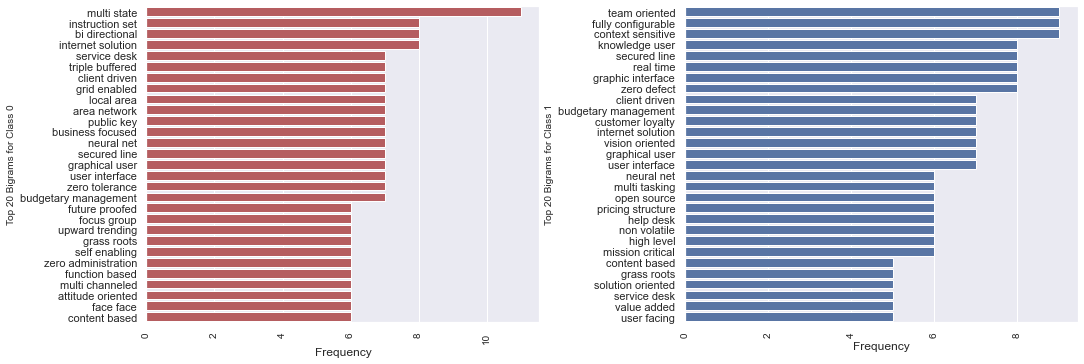

In [23]:
classes_data = [class0_bigram[1:],class1_bigram[1:]]
colors = ['r','b']
plt.figure(figsize=(15,5))
for i in range(len(classes_data)):
    plt.subplot(1,2,i+1)
    x=[x[0] for x in classes_data[i]]
    y=[x[1] for x in classes_data[i]]
    sns.barplot(y,x,color=colors[i])
    plt.xticks(rotation=90,fontsize=10)
    plt.xlabel('Frequency')
    plt.ylabel('Top 20 Bigrams for Class {}'.format(i),fontsize=10)
plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=1.0)
plt.show()

In [24]:
from wordcloud import WordCloud

In [25]:
# wordcloud function
def show_wordcloud(data,title=None):
    wordcloud = WordCloud(background_color='white',
                         max_words=500,
                         max_font_size=40,
                         scale=3,
                         random_state=42).generate(str(data))
    fig = plt.figure(1, figsize=(20,20))
    plt.axis('off')
    if title:
        fig.suptitle(title,fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

In [26]:
# create dictionary for class 0 and 1 
text_dictionary0 = {}
text_dictionary1 = {}
for i in range(len(class0_bigram)):
    text_dictionary0[class0_bigram[i][0]]=class0_bigram[i][1]
    text_dictionary1[class1_bigram[i][0]]=class0_bigram[i][1]

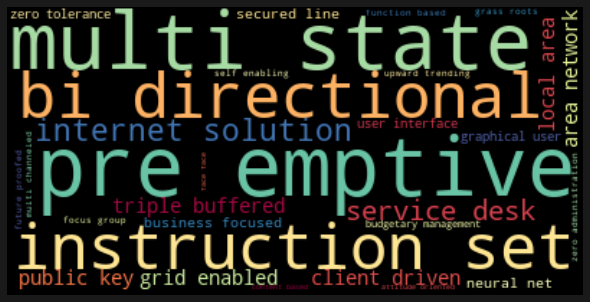

In [27]:
# Create the word cloud of the text data - class 0
wordcloud0 = WordCloud(colormap='Spectral').generate_from_frequencies(text_dictionary0)
plt.figure(figsize=(8,10), facecolor='k')
plt.imshow(wordcloud0, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

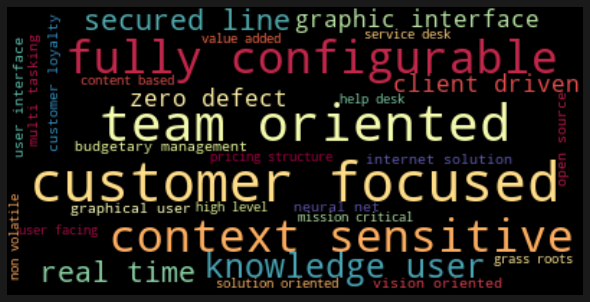

In [28]:
# Create the word cloud of the text data - class 1
wordcloud1 = WordCloud(colormap='Spectral').generate_from_frequencies(text_dictionary1)
plt.figure(figsize=(8,10), facecolor='k')
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [29]:
df['City'].value_counts()[:10]

Lisamouth       3
Williamsport    3
Port Julie      2
East Timothy    2
West Steven     2
Lake James      2
Lake Susan      2
Lake David      2
Lake Jose       2
Wrightburgh     2
Name: City, dtype: int64

In [30]:
df['Country'].value_counts()[:10]

France            9
Czech Republic    9
Greece            8
Cyprus            8
Afghanistan       8
Australia         8
Liberia           8
Turkey            8
South Africa      8
Peru              8
Name: Country, dtype: int64

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
# encode the city and country columns
# create a function to transform the data 
def encode(data):
    le = LabelEncoder()
    le.fit(data)
    return le.transform(data)

In [33]:
df['Country'] = encode(df['Country'])
df['City'] = encode(df['City'])

In [34]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,cleaned_text
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,961,0,215,2016-03-27 00:53:11,0,cloned 5thgeneration orchestration
1,80.23,31,68441.85,193.77,Monitored national standardization,903,1,147,2016-04-04 01:39:02,0,monitored national standardization
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,111,0,184,2016-03-13 20:35:42,0,organic bottom-line service-desk
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,939,1,103,2016-01-10 02:31:19,0,triple-buffered reciprocal time-frame
4,68.37,35,73889.99,225.58,Robust logistical utilization,805,0,96,2016-06-03 03:36:18,0,robust logistical utilization


In [35]:
df['Timestamp']=pd.to_datetime(df['Timestamp'])
df['Month'] = df['Timestamp'].dt.month 
df['Day'] = df['Timestamp'].dt.day     
df['Hour'] = df['Timestamp'].dt.hour   
df["Weekday"] = df['Timestamp'].dt.dayofweek

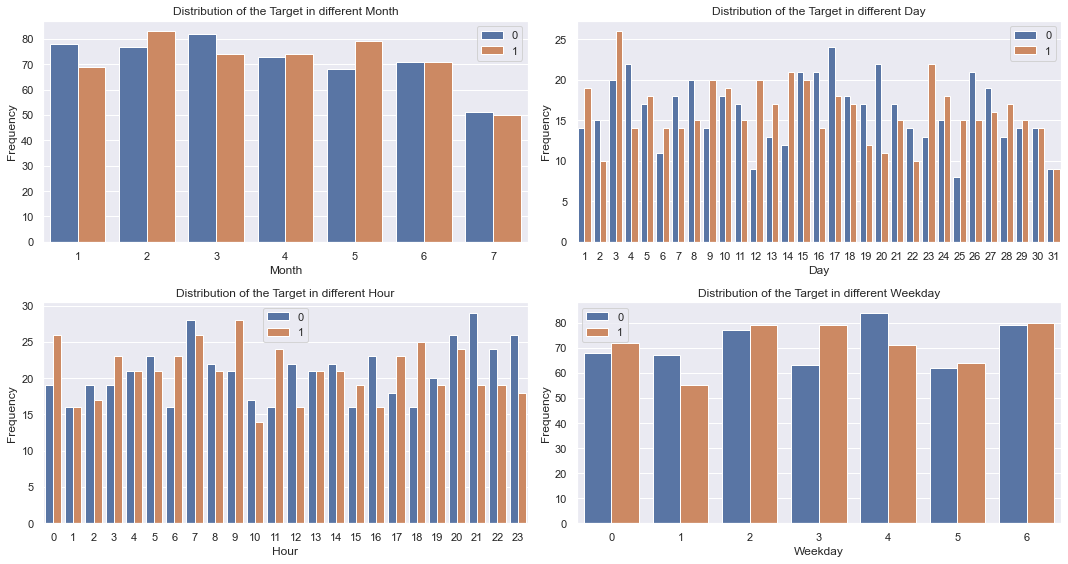

In [36]:
# plot advanced bar charts for different time columns
time_columns=['Month',"Day","Hour","Weekday"]
plt.figure(figsize=(15,8))
for i in range(len(time_columns)):
    plt.subplot(2,2,i+1)
    data=pd.DataFrame(df.groupby(time_columns[i])["Clicked on Ad"].value_counts())
    data.columns=["counts"]
    data=data.reset_index()
    sns.barplot(x=time_columns[i],
                y="counts",
                hue=data["Clicked on Ad"],
                data=data,ci=None)
    plt.title("Distribution of the Target in different {}".format(time_columns[i]))
    plt.ylabel("Frequency")
    plt.legend(loc="best")
plt.tight_layout()
plt.show()

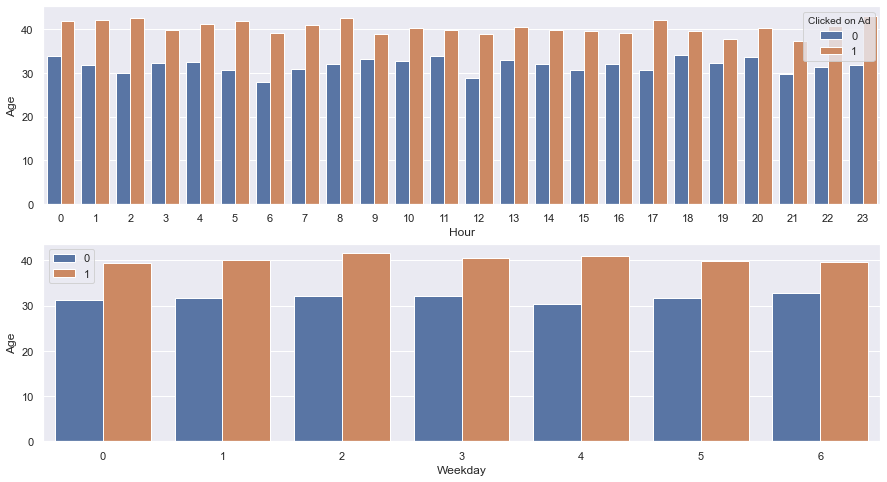

In [37]:
# Hour,Age and Target 
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
sns.barplot(x="Hour",y="Age",hue="Clicked on Ad",data=df,ci=None)
# Weekday,Age and Target 
plt.subplot(2,1,2)
sns.barplot(x="Weekday",y="Age",hue="Clicked on Ad",data=df,ci=None)
plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'Distribution of Gender Columns')

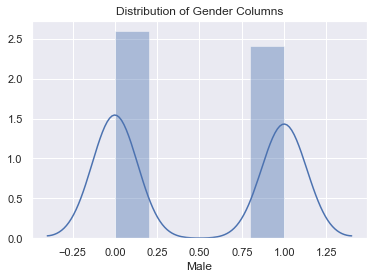

In [38]:
# distribution of gender columns
sns.distplot(df.Male)
plt.title('Distribution of Gender Columns') 

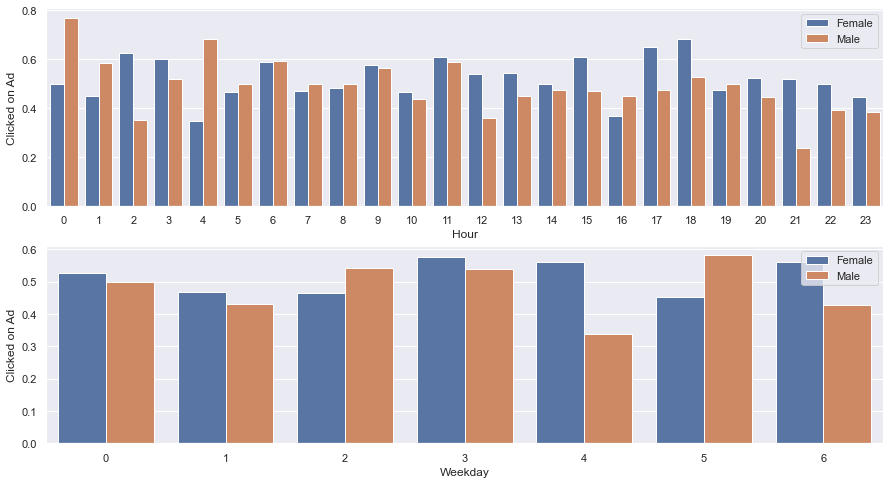

In [39]:
# Hour,Target and Gender 
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
sns.barplot(x='Hour',y='Clicked on Ad',hue="Male",data=df,ci=None)
plt.legend(('Female','Male'),loc='best')
# Weekday,Target and Gender 
plt.subplot(2,1,2)
sns.barplot(x='Weekday',y='Clicked on Ad',hue="Male",data=df,ci=None)
plt.legend(('Female','Male'),loc='best')
plt.show()

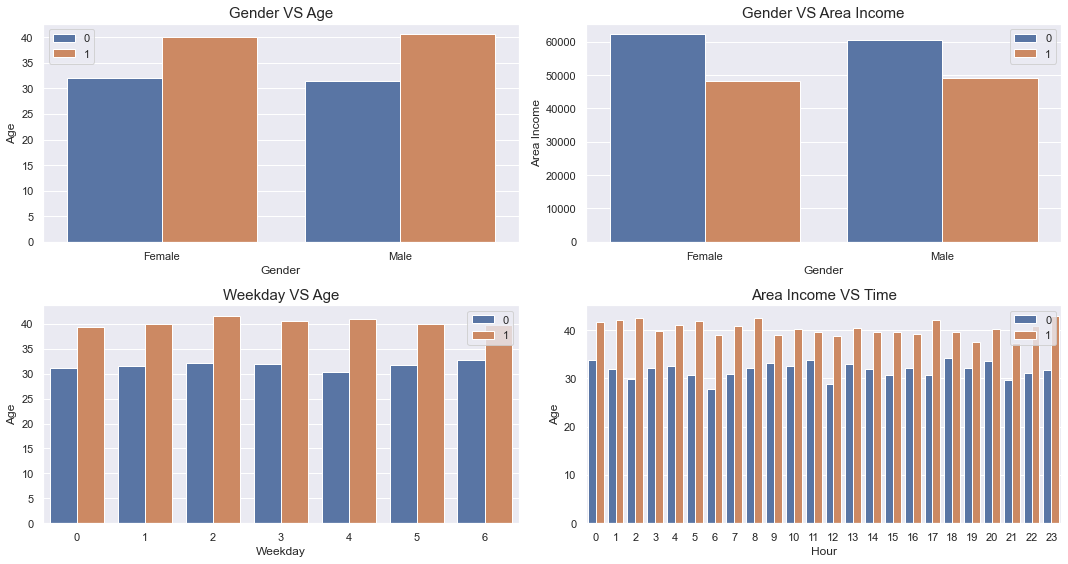

In [40]:
plt.figure(figsize=(15,8))

# Gender,Age and Target
plt.subplot(2,2,1)
sns.barplot(x='Male',y='Age',hue='Clicked on Ad',data=df,ci=None)
plt.title("Gender VS Age",fontsize=15)
plt.xticks([0,1],["Female","Male"])
plt.xlabel("Gender")
plt.legend(loc='best')

# Gender,income and Target
plt.subplot(2,2,2)
sns.barplot(x='Male',y="Area Income",hue='Clicked on Ad',data=df,ci=None)
plt.title("Gender VS Area Income",fontsize=15)
plt.xticks([0,1],["Female","Male"])
plt.xlabel("Gender")
plt.legend(loc='best')

# Age,Weekday and Target
plt.subplot(2,2,3)
sns.barplot(x='Weekday',y='Age',hue="Clicked on Ad",data=df,ci=None)
plt.title("Weekday VS Age",fontsize=15)
plt.legend(loc='best')

# Area Income,Hour and Target
plt.subplot(2,2,4)
sns.barplot(x='Hour',y='Age',hue="Clicked on Ad",data=df,ci=None)
plt.title("Area Income VS Time",fontsize=15)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

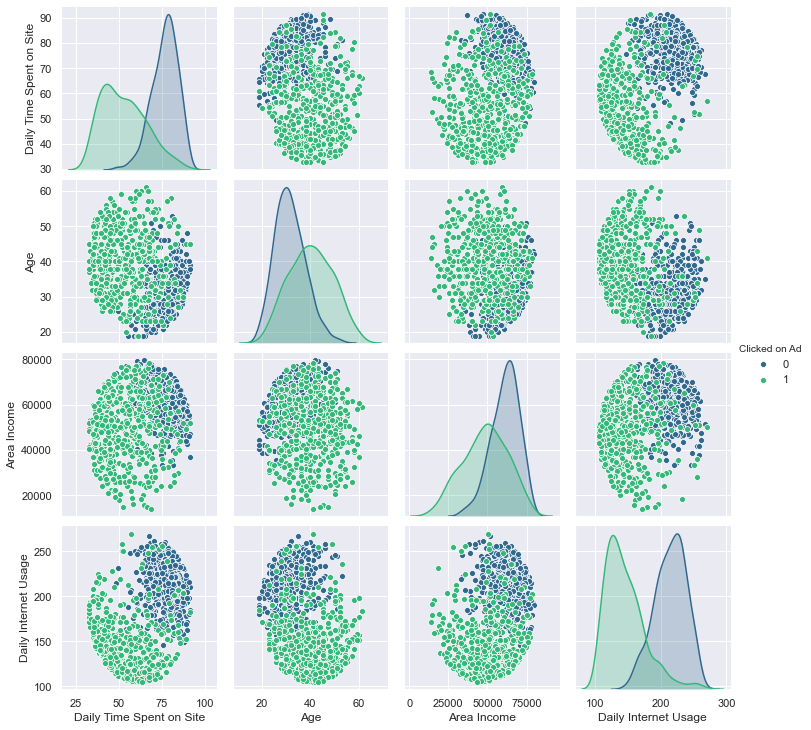

In [41]:
# Pairplot
sns.pairplot(df, hue = 'Clicked on Ad', 
             vars = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']
             , palette = 'viridis')


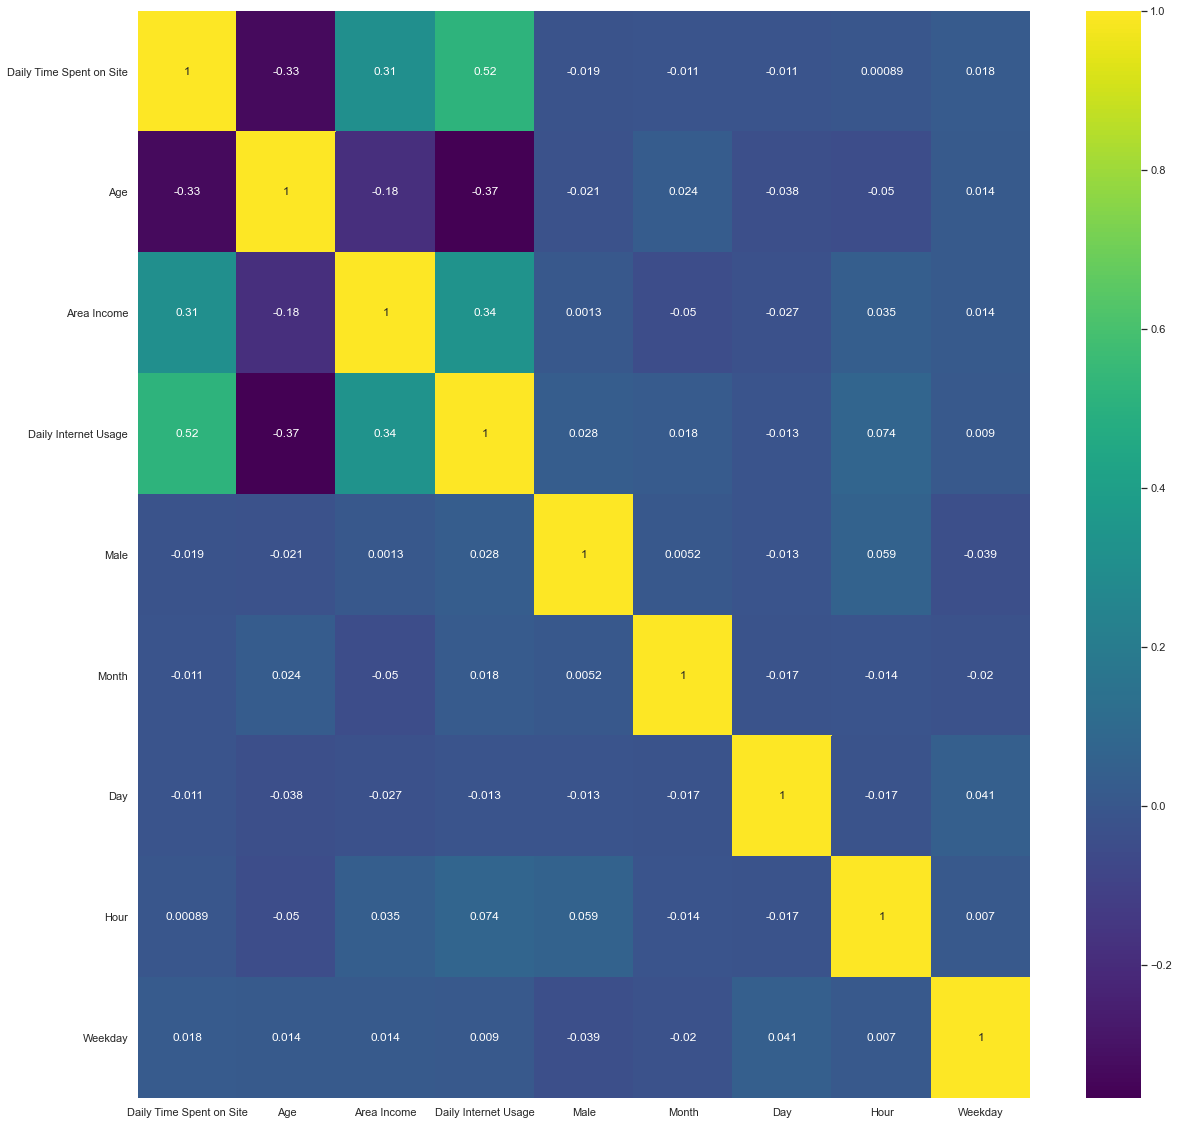

In [42]:
# Correlaiton heatmap
feature=df[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage',  'Male',
         'Month', 'Day', 'Hour','Weekday' ]]

plt.figure(figsize=(20,20))
sns.heatmap(feature.corr(), annot=True,cmap="viridis")
plt.show()

In [43]:
# declare target and inputs
inputs = df[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'City', 'Male', 'Country',
       'Month', 'Day', 'Hour',
       'Weekday']]
target = df['Clicked on Ad']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=42) 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(800, 11) (800,)
(200, 11) (200,)


In [45]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix,roc_auc_score,accuracy_score,roc_auc_score

In [46]:
# given prameters different values
random_grid = {
             'n_estimators':list(range(100,300)),
             'max_depth':list(range(1,30,2)),
              'max_features':list(range(0,len(inputs.columns))),
             'min_samples_leaf':list(range(1,50,2)),
              'min_samples_split':list(range(2,50,2))                
             }
# random forest model
rf = RandomForestClassifier(n_jobs=-1,  random_state=0)

In [47]:
# randommized searchCV
rs = RandomizedSearchCV(rf,random_grid,cv=5,scoring="f1")

In [48]:
# fit the train data
rs.fit(X_train,y_train)

C:\Users\ANKIT\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\ANKIT\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\ANKIT\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\ANKIT\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\ANKIT\Anaconda3\lib\site-packages\joblib\parallel.py", line 253, in __call__
    for func, args, kwargs in self.items]
  File "C:\Users\ANKIT\Anaconda3\lib\site-packages\joblib\parallel.py", line 253, in <listcomp>
    f

C:\Users\ANKIT\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\ANKIT\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\ANKIT\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\ANKIT\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\ANKIT\Anaconda3\lib\site-packages\joblib\parallel.py", line 253, in __call__
    for func, args, kwargs in self.items]
  File "C:\Users\ANKIT\Anaconda3\lib\site-packages\joblib\parallel.py", line 253, in <listcomp>
    f

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
                   param_distributions={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15,
                                                      17, 19, 21, 23, 25, 27,
                                                      29],
                                        'max_features': [0, 1, 2, 3, 4, 5, 6, 7,
                                                         8, 9, 10],
                                        'min_samples_leaf': [1, 3, 5, 7, 9, 11,
                                                             13, 15, 17, 19, 21,
                                                             23, 25, 27, 29, 31,
                                                             33, 35, 37, 39, 41,
                                                             43, 45, 47, 49],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                 

In [49]:
# obtian best parameters best score
rs.best_score_,rs.best_params_,rs.best_estimator_

(0.9613000417851844,
 {'n_estimators': 195,
  'min_samples_split': 10,
  'min_samples_leaf': 1,
  'max_features': 4,
  'max_depth': 23},
 RandomForestClassifier(max_depth=23, max_features=4, min_samples_split=10,
                        n_estimators=195, n_jobs=-1, random_state=0))

In [50]:
# use the best params
rfc = RandomForestClassifier(n_estimators=rs.best_params_['n_estimators'],
                           min_samples_split=rs.best_params_['min_samples_split'], 
                           min_samples_leaf=rs.best_params_['min_samples_leaf'],
                           max_features=rs.best_params_['max_features'],
                           max_depth=rs.best_params_['max_depth'],
                           n_jobs=-1,  random_state=0)

In [51]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=23, max_features=4, min_samples_split=10,
                       n_estimators=195, n_jobs=-1, random_state=0)

In [52]:
# Score for train and test data 
print("Score of train data :" ,rfc.score(X_train,y_train))
print("Score of test data :" ,rfc.score(X_test,y_test))

Score of train data : 0.99
Score of test data : 0.93


In [53]:
# obtian the preditions
X_train_pre = rfc.predict(X_train)
X_test_pre = rfc.predict(X_test)

In [54]:
# F1 score
f1_score_train = f1_score(y_train,X_train_pre)
f1_score_test=f1_score(y_test,X_test_pre)
print("F1 Score of train data :" , f1_score_train)
print("F1 Score of test data :" ,f1_score_test)

F1 Score of train data : 0.9896103896103896
F1 Score of test data : 0.9369369369369369


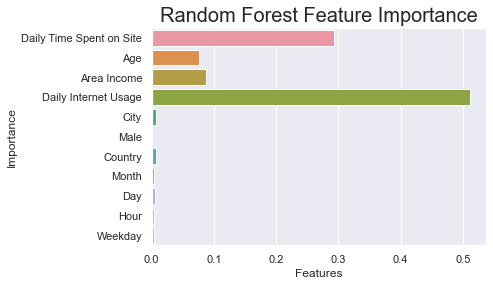

In [55]:
# Feature Importance
sns.barplot(rfc.feature_importances_,X_train.columns)
plt.title('Random Forest Feature Importance',fontsize=20)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

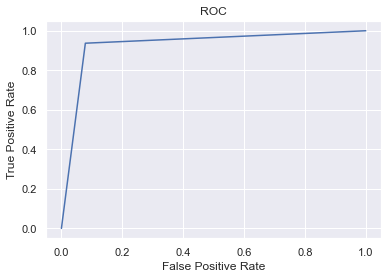

In [56]:
# Plot Random Forest ROC
from sklearn.metrics import roc_curve
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test,X_test_pre)
rf_roc_auc = roc_auc_score(y_test, X_test_pre)
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()